In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

#### Strain info boxes

In [151]:
groups= ['Busia parental', 'Busia selected', 'Kisumu']

mortality_df = pd.DataFrame({'Group':groups, 'colour':['indianred', 'palegreen', 'deepskyblue'], 'Deltamethrin': [100, 69.7, 100], 'Permethrin':[92.6, 21.7, 100]})

In [152]:
mortality_df =  mortality_df.melt(id_vars=['Group', 'colour'], var_name='insecticide', value_name='mortality')

In [153]:
lowerCIs = [96.26, 63.16, 97, 85.56, 14.92, 98.12]
upperCIs = [100, 75.55, 100, 100, 30.46, 100]

mortality_df['lowerCIs'] = lowerCIs
mortality_df['upperCIs'] = upperCIs

In [154]:
mortality_df

,Group,colour,insecticide,mortality,lowerCIs,upperCIs
0,Busia parental,indianred,Deltamethrin,100.0,96.26,100.00
1,Busia selected,palegreen,Deltamethrin,69.7,63.16,75.55
2,Kisumu,deepskyblue,Deltamethrin,100.0,97.00,100.00
3,Busia parental,indianred,Permethrin,92.6,85.56,100.00
4,Busia selected,palegreen,Permethrin,21.7,14.92,30.46
5,Kisumu,deepskyblue,Permethrin,100.0,98.12,100.00


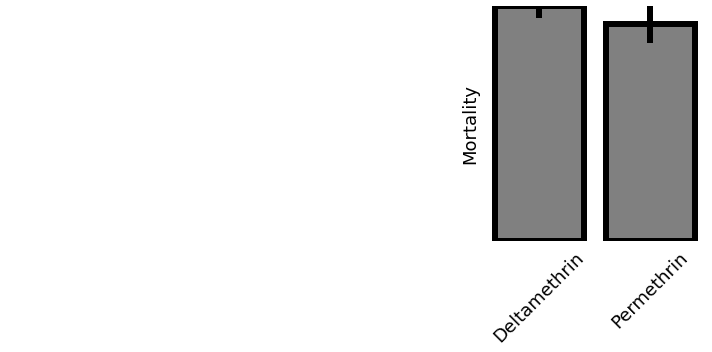

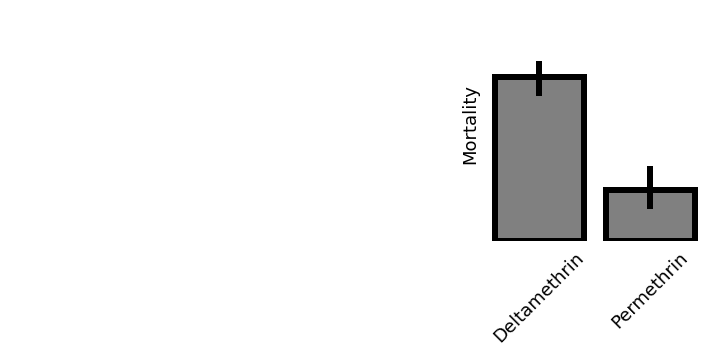

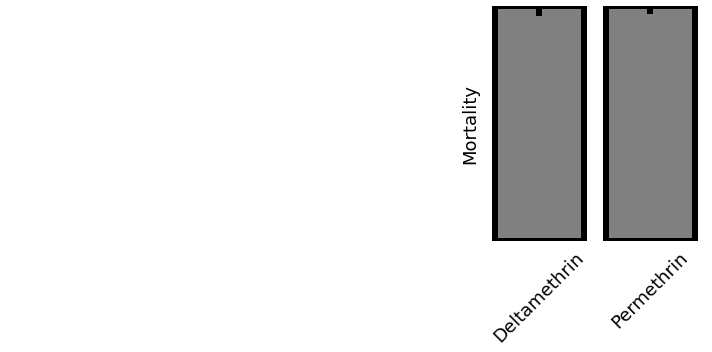

In [173]:
for gro in mortality_df.Group.unique():
    m_df = mortality_df.query("Group == @gro").reset_index(drop=True)
    fig, ax = plt.subplots(1,2, figsize=[10,5], gridspec_kw={'width_ratios':[2,1]})
    sns.barplot(ax=ax[1], x='insecticide', y='mortality', data=m_df, color='grey', edgecolor='black', linewidth=6)

    l = matplotlib.lines.Line2D([0, 0], [m_df['lowerCIs'][0], m_df['upperCIs'][0]], color='black', linewidth=6)
    ax[1].add_line(l) 
    l = matplotlib.lines.Line2D([1, 1], [m_df['lowerCIs'][1], m_df['upperCIs'][1]], color='black',linewidth=6)
    ax[1].add_line(l) 

    for axes in ax:
        sns.despine(ax=axes, left=True, bottom=True)
        axes.tick_params(left=False, labelleft=False)
        #axes.set_facecolor(m_df.colour[0])
    #fig.set_facecolor(m_df.colour[0])
    
    ax[0].tick_params(bottom=False, labelbottom=False)
    ax[1].tick_params(bottom=False)
    ax[1].set_ylim(0,100)
    ax[1].set_ylabel(ylabel='Mortality', fontsize=18)
    ax[1].set_xlabel("")
    ax[1].set_xticklabels(labels=['Deltamethrin', 'Permethrin'], rotation=45, fontsize=18)
    fig.tight_layout()
    fig.savefig(f"/home/sanj/projects/IR/rna-seq-busia/docs/figures/{gro}.mortality.png", dpi=300)